In [ ]:
!pip3 install ktrain
import ktrain
from ktrain import text

In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_lift_curve

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
# import ktrain
# from ktrain import text

#**Dataset**

In [ ]:
train = pd.read_csv('train_intensity_all.csv')

In [ ]:
test = pd.read_csv('test_intensity_all.csv')
test.columns =['id', 'text', 'label', 'weight']

In [ ]:
train.columns =['id', 'text', 'label', 'weight']
train

##**Preprocessing**

In [ ]:
train.text = train['text'].str.replace('[^\w\s]', '', regex=True)

In [ ]:
train.text = train['text'].str.lower()

In [ ]:
train.text =  train['text'].str.replace('\d+', '')

In [ ]:
test.text = test['text'].str.replace('[^\w\s]', '', regex=True)

In [ ]:
test.text = test['text'].str.lower()

In [ ]:
test.text =  test['text'].str.replace('\d+', '')

In [ ]:
train

In [ ]:
test

In [ ]:
train_intensity_csv_data = train.to_csv()

##**EDA**

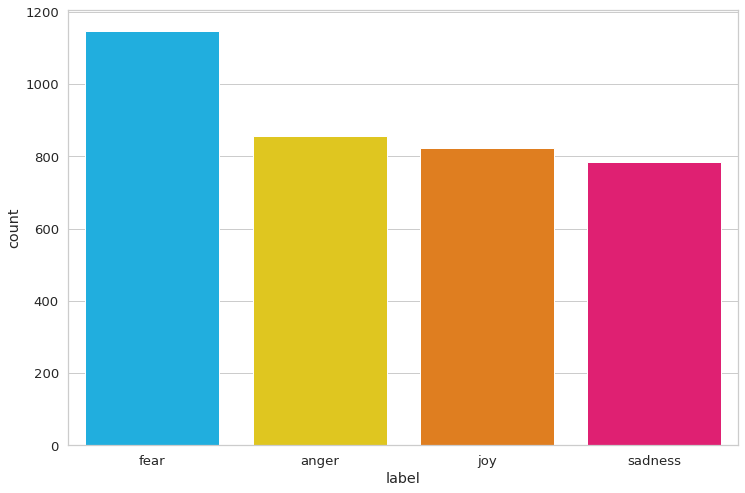

In [ ]:
sns.countplot(train['label'],order = train['label'].value_counts(normalize=True).index)

In [ ]:
train['text_length'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

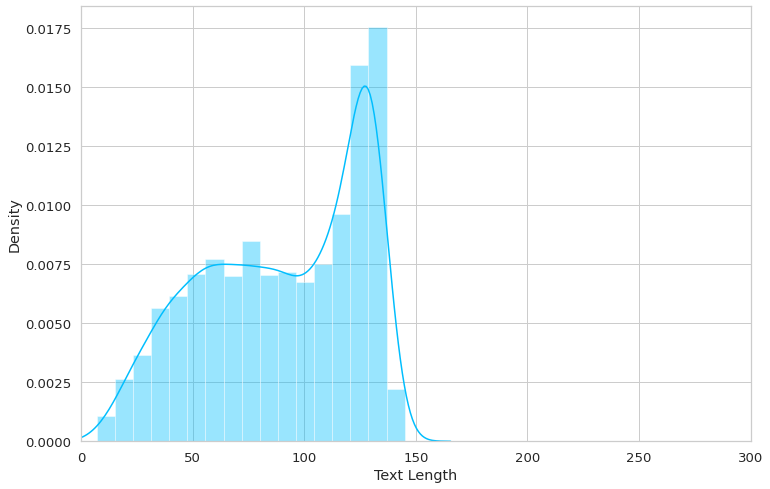

In [ ]:
sns.distplot(train['text_length'])
plt.xlim([0, 300]);
plt.xlabel('Text Length');

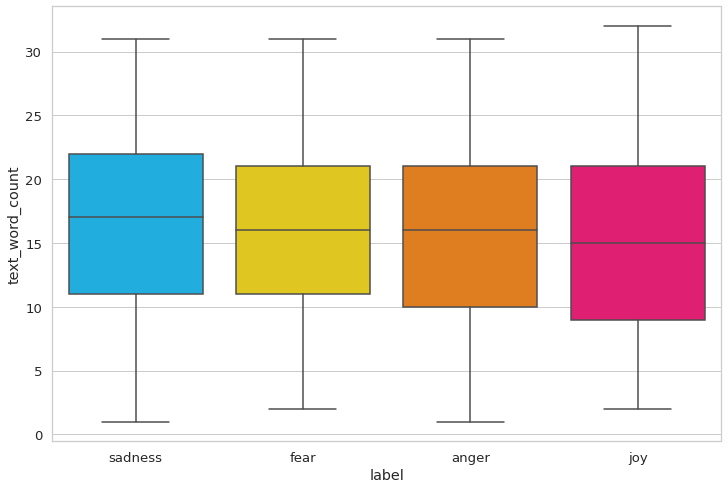

In [ ]:
sns.boxplot(x="label", y="text_word_count", data=train)

In [ ]:
# Creating individual dataframes of different emotions
sadness = train[train['label']=='sadness']['text']
joy = train[train['label']=='joy']['text']
anger = train[train['label']=='anger']['text']
fear = train[train['label']=='fear']['text']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]


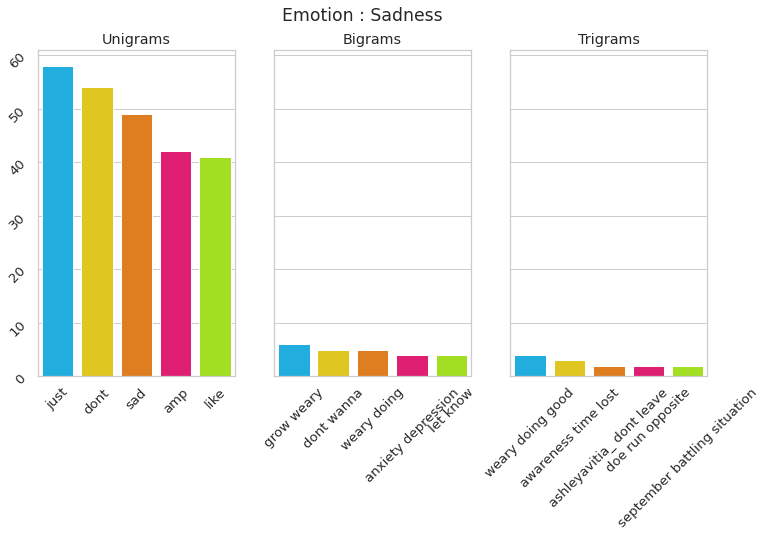

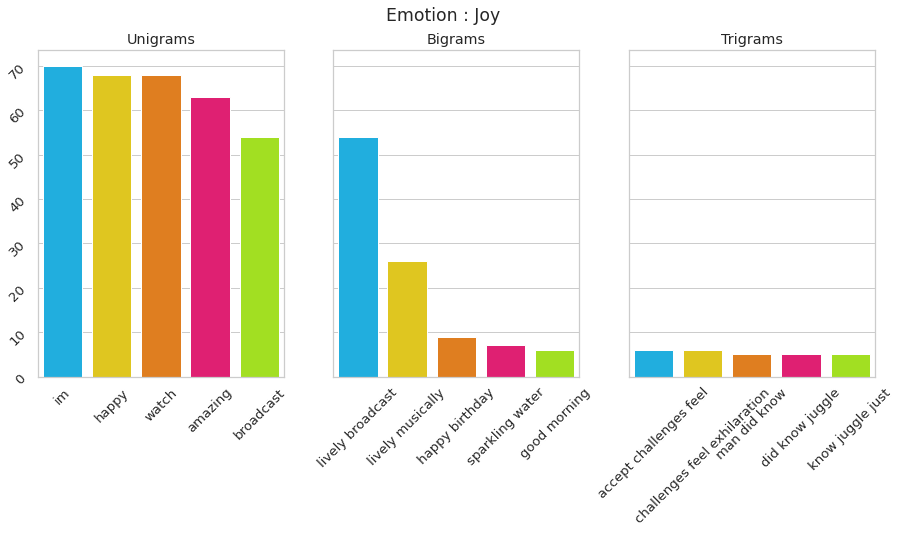

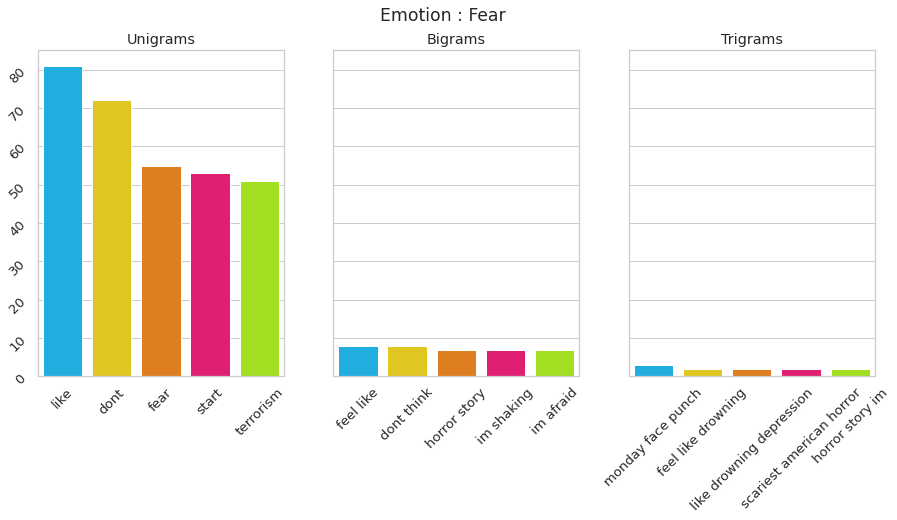

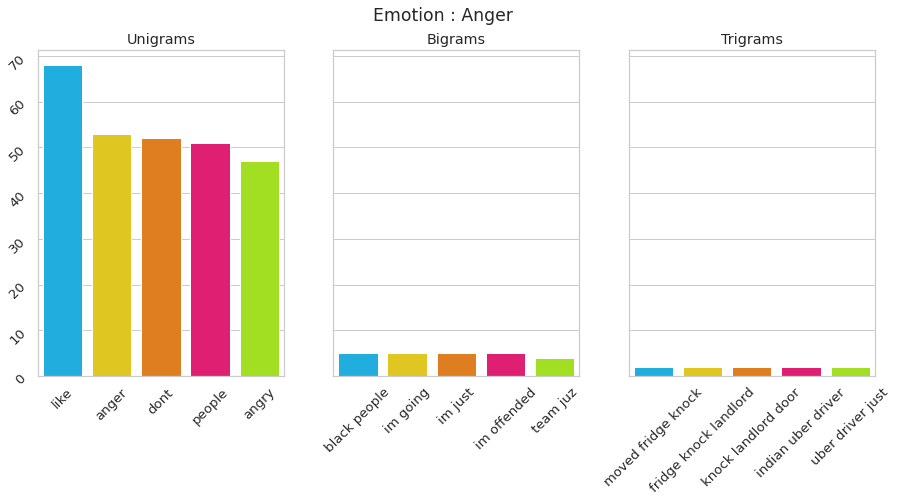

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot( list(dict(sad_unigrams).keys()), list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_bigrams).keys()), list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_trigrams).keys()), list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot( list(dict(joy_unigrams).keys()), list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_bigrams).keys()), list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot( list(dict(joy_trigrams).keys()), list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot( list(dict(fear_unigrams).keys()), list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_bigrams).keys()), list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(fear_trigrams).keys()), list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot( list(dict(anger_unigrams).keys()), list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_bigrams).keys()), list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(anger_trigrams).keys()), list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#**Fast Text**

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train,
                                                                   text_column = 'text',
                                                                   label_columns = 'label',
                                                                   val_df = test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'standard')

In [ ]:
model = text.text_classifier('fasttext', (X_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model,
                             train_data=(X_train, y_train),
                             val_data=(X_test, y_test),
                             batch_size=32)

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.fit_onecycle(3e-3, 20)

In [ ]:
learner.fit_onecycle(2e-5, 20)

In [ ]:
learner.validate(val_data=(X_test, y_test), class_names=['sadness', 'joy', 'anger', 'fear'])

#**Bert**

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train,
                                                                   text_column = 'text',
                                                                   label_columns = 'label',
                                                                   val_df = test,
                                                                   maxlen = 300,
                                                                   preprocess_mode = 'bert')

In [ ]:
model = text.text_classifier('bert', train_data=(X_train, y_train), preproc=preproc)

In [ ]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
learner.fit_onecycle(2e-5, 10)

In [ ]:
learner.validate(val_data=(X_test, y_test), class_names=['sadness', 'joy', 'anger', 'fear'])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
message = 'I used to love you back then. I hate you'
prediction = predictor.predict(message)
print('predicted: ',prediction)

In [ ]:
loss_plot = learner.plot()

#**Distilbert CNN**

In [ ]:
#!pip uninstall transformers
!pip install transformers #==3.0.2

In [ ]:
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [ ]:
new_df = train

In [ ]:
labels_dict = {'sadness':0, 'joy':1, 'anger':2, 'fear':3}

In [ ]:
train['description'] = train['label'].map(labels_dict )
train.head()

In [ ]:
dup = train

In [ ]:
new_df['label'] = train.iloc[:, 6:].values.tolist()

In [ ]:
new_df

In [ ]:
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 4
EPOCHS = 4
LEARNING_RATE = 1e-05
MAX_LEN =300
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

In [ ]:
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.label
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

model = DistilBERTClass()
model.to(device)

In [ ]:
def loss_fn(outputs, targets):
    #return torch.nn.BCEWithLogitsLoss()(outputs, targets)
    return torch.nn.CrossEntropyLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(epoch):
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        targets = targets.squeeze_()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
  train(epoch)

In [ ]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            targets = targets.squeeze_()
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
outputs, targets = validation(testing_loader)

final_outputs = np.array(outputs) >=0.5

In [ ]:
final_out = np.argmax(outputs, axis=1)

In [ ]:
val_hamming_loss = metrics.hamming_loss(targets, final_out)
val_hamming_score = hamming_score(np.array(targets), np.array(final_out))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

#**nbSvm**

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train,
                                                                   text_column = 'text',
                                                                   label_columns = 'label',
                                                                   val_df = test,
                                                                   max_features=30000,
                                                                   maxlen = 300,
                                                                   ngram_range=3,
                                                                   preprocess_mode = 'standard')

In [ ]:
model = text.text_classifier('nbsvm', (X_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model,
                             train_data=(X_train, y_train),
                             val_data=(X_test, y_test),
                             batch_size=32)

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.autofit(7e-3,  6)

In [ ]:
learner.validate(class_names=preproc.get_classes())

In [ ]:
learner.view_top_losses(n=1, preproc=preproc)

In [ ]:
p = ktrain.get_predictor(learner.model, preproc)

In [ ]:
p.predict("He seems like a nice guy")

In [ ]:
p.predict("What a day")

In [ ]:
p.predict("He does not like me")

In [ ]:
 pip install wikipedia

In [ ]:
import wikipedia
import os

In [ ]:
def whoIs(query,sessionID="general"):
    try:
        return wikipedia.summary(query)
    except:
        for newquery in wikipedia.search(query):
            try:
                return wikipedia.summary(newquery)
            except:
                pass
    return "I don't know about "+query

In [ ]:
def learnq(query,sessionID="general"):
    print(query)
    try:
        with open("learn"+".txt", "a") as myfile:
            myfile.write("\n{% block %}\n")
            quess = "    {% client %}"+query+"{% endclient %}\n"
            myfile.write(quess)
        return "AnSwer"
    except:
        pass
    return "write the question again"
def learna(query,sessionID="general"):
    print(query)
    try:
        with open("learn"+".txt", "a") as myfile:
            quess = "    {% response %}"+query+"{% endresponse %}\n"
            myfile.write(quess)
            myfile.write("{% endblock %}\n")

        return "Answer is recorded"
    except:
        pass
    return "write the answer again"